In [2]:
import pandas as pd
import os
import numpy as np

import cufflinks as cf

import plotly.plotly as py
import plotly.tools as tls 
import plotly.graph_objs as go

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.style.use('seaborn-whitegrid')

# Second Part - Parsing Data

In [72]:
variable = pd.read_csv('C:/Users/Master Bustache/Downloads/the-movies-dataset/movies_metadata.csv')
variable.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [71]:
campy_movies = pd.read_csv('campy_movies.csv')
campy_movies.head()

,Unnamed: 0,title,year,imdb,genre,n_imdb
0,0,Half Human: The Story of the Abominable Snowman,1958,2.9,"Creatures, Thriller",29.0
1,1,Plan 9 from Outer Space,1959,4.0,"Aliens, Classic, Classic Sci-Fi, Featured Clas...",40.0
2,2,The Phantom of the Operetta,1960,6.8,Comedy,68.0
3,3,Mr. Sardonicus,1961,6.7,"Comedy, Mystery",67.0
4,4,House on Bare Mountain,1962,4.1,Comedy,41.0


In [6]:
#Rename Fear to Fear Inc.
campy_movies['title'] = campy_movies['title'].replace("Fear", "Fear, Inc.")

### Merge Campy Movies and Variable

In [7]:
merged = pd.merge(left=variable, right=campy_movies, left_on='title', right_on='title')

In [9]:
dates = merged.loc[:, 'release_date']
merged.loc[:, 'release_date'] = pd.to_datetime(dates, format='%Y-%m-%d', errors='coerce')
merged = merged.sort_values(by=['release_date'])

### Delete Duplicates

In [10]:
#Drop Bug 2006
merged = merged.drop([99])
#Drop Feast 2005 and 2014
merged = merged.drop([121, 122])
#Drop The Old Dark House 1932
merged = merged.drop([101])
#Drop April Fool's Day 2008
merged = merged.drop([6])
#Drop Willard 2003
merged = merged.drop([73])
#Drop Night of the Zombies 1980
merged = merged.drop([67])
#Drop Scary Movie 1989
merged = merged.drop([36])
#Drop Knock Knock 2008
merged = merged.drop([221])
#Drop Little Monsters 1989 and 2012
merged = merged.drop([51, 52])
#Drop The Wicker Man 1973
merged = merged.drop([56])
#Drop Sugar Hill 1994
merged = merged.drop([71])
#Drop Bad Karma 2002 and 2012
merged = merged.drop([164, 165])
#Drop House 1977 and 2008
merged = merged.drop([13, 14])
#Drop Sweeney Todd: The Demon Barber of Fleet Street 1936 and 1982
merged = merged.drop([127,128])
#Drop The Witches 1966 and 1967
merged = merged.drop([83, 84])
#Drop The Black Cat 1934 and 1941 and 1981
merged = merged.drop([103, 104, 105])
#Drop Midnight 1934 and 1939 and 1982 and 1998
merged = merged.drop([89,  90, 91]) #93,
#Drop Pizza 2005
merged = merged.drop([200, 201, 202])

# Third Part - Data Analysis

### Count of Campy Horror Movies Released Per Year

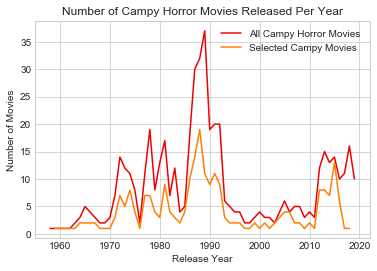

In [11]:
time = merged.loc[:,['year', 'release_date', 'title']]

sample1_table = campy_movies.groupby('year').count()
sample1_x = sample1_table.index
sample1_y = sample1_table.iloc[:, 0]
plt.plot(sample1_x, sample1_y, label='All Campy Horror Movies', color='#ee0000')

sample_table = time.groupby('year').count()
sample_x = sample_table.index
sample_y = sample_table.iloc[:, 0]
plt.plot(sample_x, sample_y, label='Selected Campy Movies', color='#ff7f00')

plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Campy Horror Movies Released Per Year')
plt.legend(loc='best')

### Count of Campy Horror Movies Released Per Year Between 1980's and 1990's   
The movie 'The Return of the Living Dead' may have had an affect on the popularity of Campy Horror Movies in the mid 80's. 

Text(0.5, 1.0, 'Count of Campy Horror Movies Released Between 1980 and 1990')

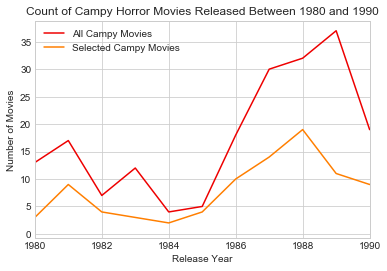

In [12]:
plt.plot(sample1_x, sample1_y, label='All Campy Movies', color='#ee0000')
plt.plot(sample_x, sample_y, label='Selected Campy Movies', color='#ff7f00')
plt.legend(loc='best')
plt.xlim(1980,1990)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title("Count of Campy Horror Movies Released Between 1980 and 1990")

In [67]:
money = merged.loc[:,['year', 'release_date', 'title', 'revenue', 'budget']]
money.loc[money['year'].between(1984, 1985)]

,year,release_date,title,revenue,budget
157,1984,1984-01-03,Bloodsuckers from Outer Space,0.0,0
230,1984,1984-08-03,Rats: Night of Terror,0.0,0
49,1985,1985-05-15,The Return of the Living Dead,14237000.0,4000000
111,1985,1985-06-14,The Stuff,0.0,1700000
62,1985,1985-11-08,Transylvania 6-5000,0.0,0
76,1985,1985-11-15,Once Bitten,10000000.0,3200000


### English Language Movie Trends
The majority of Campy Horror Movies that are relaeased without the original_language being English, lack Revenue and Budget Data.

Text(0.5, 1.0, 'Count of Campy Horror Movies Released Per Year')

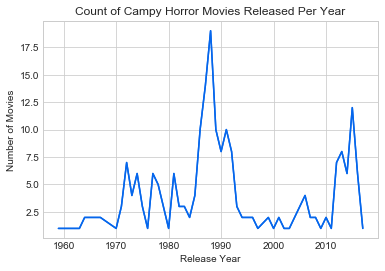

In [15]:
only_en_camp = merged.loc[merged['original_language'] == 'en']
only_english = only_en_camp.loc[:,['year', 'release_date', 'title']]
plt.plot(only_english.groupby('year').count(), color='#0566ec')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title("Count of Campy Horror Movies Released Per Year")

Text(0.5, 1.0, 'Count of Campy Horror Movies Released Between 1980 and 1990')

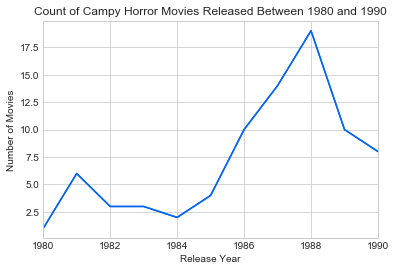

In [16]:
plt.plot(only_english.groupby('year').count(), color='#0566ec')
plt.xlim(1980,1990)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title("Count of Campy Horror Movies Released Between 1980 and 1990")

In [58]:
eng_money = only_en_camp.loc[:,['year', 'release_date', 'title', 'revenue', 'budget']]
eng_search = eng_money.loc[eng_money['year'].between(1982, 1986)]
eng_search.loc[:, 'budget'] = eng_search['budget'].astype(float)
eng_search.sort_values('budget', ascending=False).head()

,year,release_date,title,revenue,budget
23,1986,1986-12-19,Little Shop of Horrors,38748395.0,25000000.0
25,1982,1982-11-12,Creepshow,21028755.0,8000000.0
5,1986,1986-03-27,April Fool's Day,0.0,5000000.0
49,1985,1985-05-15,The Return of the Living Dead,14237000.0,4000000.0
76,1985,1985-11-15,Once Bitten,10000000.0,3200000.0


### Find Average Budget of Movies Realeased 1982 - 1986
The Budget Data reflects the number of Campy Horror Movies that were released per year. Also it supports the claim that the movie 'The Return of the Living Dead' may have had a possitive affect on Campy Horror Movies during the mid 80's. 

Text(0.5, 1.0, 'Count of Campy Horror Movies Released Between 1982 - 1986')

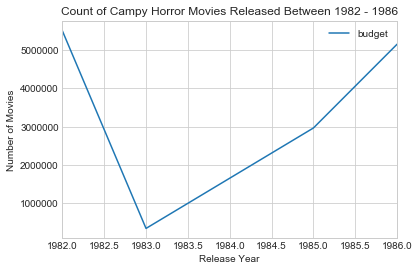

In [59]:
#Deal with the Zeroes, Making Mean or average
greater = eng_search[eng_search['budget'] > 0]
greater_than = greater.loc[:,['year', 'budget']]
greater_than.groupby('year').mean().plot(kind='line')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title("Count of Campy Horror Movies Released Between 1982 - 1986")

### Most Popular Campy Horror Movie Subgenres

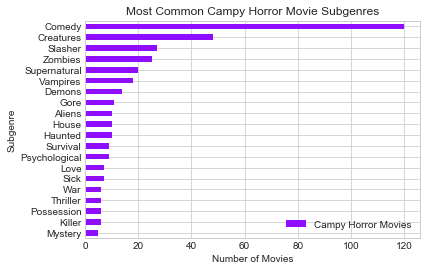

In [69]:
# 20 Most Common Genres in Merged
genres = merged.loc[:,['year', 'release_date', 'title', 'genre']]
new_genre = pd.Series(''.join(genres["genre"]).split())
table = str.maketrans(dict.fromkeys(","))
top_genres = new_genre.str.translate(table).value_counts()[:20]
ax = top_genres.plot(kind="barh", color='#8f0eff', label='Campy Horror Movies')
ax.invert_yaxis()
plt.xlabel('Number of Movies')
plt.ylabel('Subgenre')
plt.title("Most Common Campy Horror Movie Subgenres")
plt.legend(loc='best')

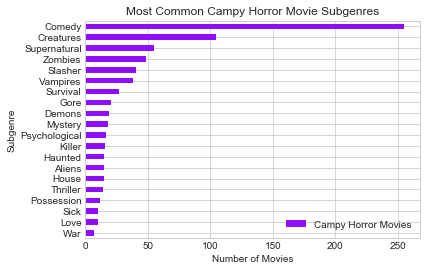

In [22]:
# 20 Most Common Genres in Campy_Movies
camp_genre = pd.Series(''.join(campy_movies["genre"]).split())
camp_table = str.maketrans(dict.fromkeys(","))
top_camp_genres = camp_genre.str.translate(camp_table).value_counts()[:20]
ay = top_camp_genres.plot(kind="barh", color='#8f0eff', label='Campy Horror Movies')
ay.invert_yaxis()
plt.xlabel('Number of Movies')
plt.ylabel('Subgenre')
plt.title("Most Common Campy Horror Movie Subgenres")
plt.legend(loc='best')

### Most Popular Language

In [23]:
language = merged.loc[:,['year', 'title', 'original_language']]

In [24]:
# Write Full Language
full = {'en':'English', 'it':'Italian', 'ja':'Japanese', 'fr':'French', 'it':'Italian','pt':'Portugese',
    'ta':'Tamil', 'id':'Indonesian', 'cn':'Cantonese', 'ko':'Korean', 'nl':'Dutch', 'de':'German', 'es':'Spanish'}
language.loc[:, 'original_language'] = language.loc[:, 'original_language'].map(full)

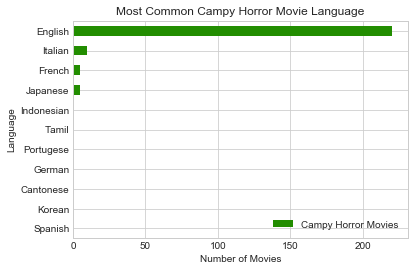

In [25]:
language['original_language'].value_counts().plot(kind='barh', color = '#228d00', label='Campy Horror Movies').invert_yaxis()
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.title("Most Common Campy Horror Movie Language")
plt.legend(loc='lower right')

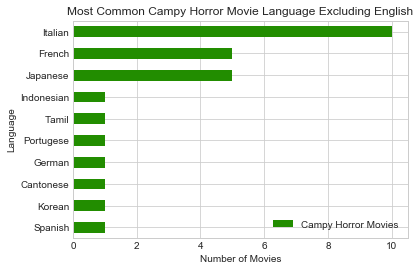

In [26]:
# Excluding English
language['original_language'].value_counts()[1:].plot(kind='barh', color = '#228d00', label='Campy Horror Movies').invert_yaxis()
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.title("Most Common Campy Horror Movie Language Excluding English")
plt.legend(loc='lower right')

### Popularity Rating Over Time

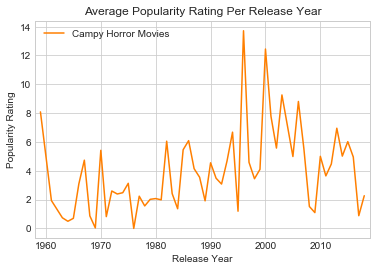

In [60]:
merged.loc[:, 'popularity'] = merged['popularity'].astype(float)
popularity = merged.loc[:,['year', 'popularity']]
pop_table = popularity.groupby('year').mean()
pop_x = pop_table.index
pop_y = pop_table.iloc[:,0]
plt.plot(pop_x, pop_y, color= '#ff7f00', label='Campy Horror Movies')
plt.xlabel('Release Year')
plt.ylabel('Popularity Rating')
plt.title("Average Popularity Rating Per Release Year")
plt.xlim(1958,2019)
plt.legend(loc='best')

### Average Runtime

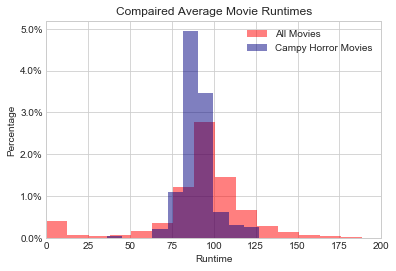

In [74]:
all_avg_runtime = variable.loc[:,['runtime']]
avg_runtime = merged.loc[:,['runtime']]

wide_x = avg_runtime.iloc[:, 0]
tall_x = all_avg_runtime.iloc[:, 0]

plt.hist(tall_x, bins=100, density=True, label='All Movies', alpha=0.5,  color='#ff0000')
plt.hist(wide_x, bins=10, density=True, label='Campy Horror Movies', alpha=0.5,  color='#000080')
plt.xlim(0, 200)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='best')
plt.title("Compaired Average Movie Runtimes")
plt.xlabel('Runtime')
plt.ylabel('Percentage')
plt.show()

### Average Runtime Over Years

(1958, 2019)

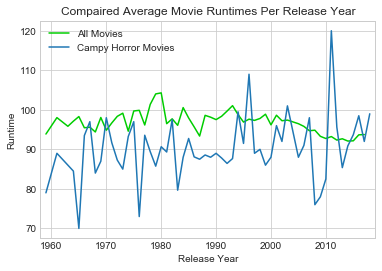

In [28]:
variable['year'] = variable['release_date'].str[:4].astype(float)
all_avg_runtime_years = variable.loc[:,['year', 'runtime']]
all_avg_runtime_years = all_avg_runtime_years[all_avg_runtime_years['year'] > 1958]
all_avg_runtime_years = all_avg_runtime_years[all_avg_runtime_years['year'] < 2018]
all_avg_runtime_years = all_avg_runtime_years[all_avg_runtime_years['year'] != 2004]
all_avg_runtime_years = all_avg_runtime_years[all_avg_runtime_years['year'] != 1960]
all_avg_runtime_years = all_avg_runtime_years[all_avg_runtime_years['year'] != 1962]

long_table = all_avg_runtime_years.groupby('year').mean()
long_x = long_table.index
long_y = long_table.iloc[:, 0]
plt.plot(long_x, long_y, label='All Movies', color= '#00cd00')

avg_runtime_years = merged.loc[:,['year', 'runtime']]
short_table = avg_runtime_years.groupby('year').mean()
short_x = short_table.index
short_y = short_table.iloc[:, 0]
plt.plot(short_x, short_y, label='Campy Horror Movies')

plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title("Compaired Average Movie Runtimes Per Release Year")
plt.legend(loc='best')
plt.xlim(1958,2019)

### Average Runtime for Subgenres

Text(0.5, 1.0, 'Average Runtime for Subgenres')

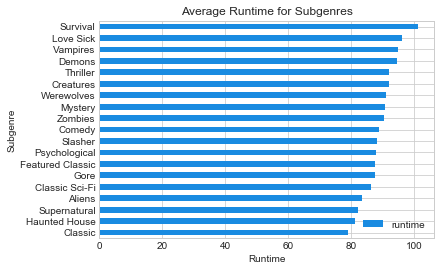

In [65]:
avg_genre_runtime = merged.loc[:,['genre', 'runtime']]
new_avg = pd.DataFrame(avg_genre_runtime.genre.str.split(',').tolist(), index=avg_genre_runtime.runtime).stack()
new_avg = new_avg.reset_index([0, 'runtime'])
new_avg.columns = ['runtime', 'genre']

avg_run = new_avg.groupby('genre', as_index=False).mean()
avg_run['genre'] = new_avg['genre'].str.strip()
avg_run = avg_run.groupby('genre').mean()
avg_run.sort_values('runtime', ascending=True).plot(kind='barh', color='#198be1')
plt.xlabel('Runtime')
plt.ylabel('Subgenre')
plt.title("Average Runtime for Subgenres")

### Average Runtime for Genre Top 20 Subgenres

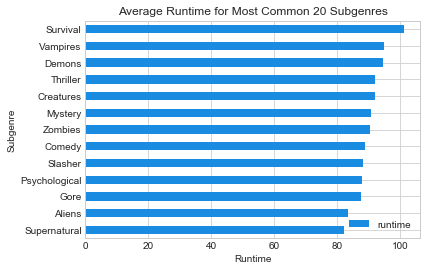

In [66]:
best = top_genres.to_frame()
best.reset_index(level=0, inplace=True)
best.columns = ['genre', 'count']

avg_run.reset_index(level=0, inplace=True)
avg_run.columns = ['genre', 'runtime']

best_avg = avg_run[avg_run['genre'].isin(best['genre'])]
best_avg = best_avg.set_index(best_avg['genre'])
best_avg.sort_values('runtime', ascending=True).plot(kind='barh', color='#198be1', label='Campy Horror Movies')
plt.xlabel('Runtime')
plt.ylabel('Subgenre')
plt.title("Average Runtime for Most Common 20 Subgenres")
plt.legend(loc='best')